In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

In [3]:
# 加载鸢尾花数据集
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df['label'] = iris.target
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# 提取前100条数据
data = np.array(df.iloc[0:100, [0, 1, -1]])
# 得到x(特征向量)、y(分类标签)
x, y = data[:, :-1], data[:, -1]

# 将两类分类标签分别替换为1与-1，便于感知机处理
y = np.array([1 if i == 1 else -1 for i in y])
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [49]:
class Model:
    def __init__(self):
        # 初始化权重，特征向量长度为2，故在初始化中故将其分别赋予1的权重
        self.w = np.zeros(len(data[0]) - 1)
        # 初始化偏置为0
        self.b = 0
        # 初始化学习率为0.1
        self.rate = 0.1

    # 定义sign函数,用于判断当前点是否分类正确
    def sign(self, x, w, b):
        y = np.dot(w, x) + b # y = w[0]*x[0] + w[1]*x[1] + b
        return y

    def fit(self, X_train, Y_train):
        while True:
            wrong_count = 0  # 错误分类点计数器
            for i in range(len(X_train)):
                x = X_train[i]
                y = Y_train[i]
                print(w, x, np.dot(w, x))
                if y * self.sign(x, self.w, self.b) <= 0:
                    self.w = self.w + self.rate * np.dot(x,y)
                    self.b = self.b + self.rate * y
                    wrong_count += 1
            if wrong_count == 0:  # 当损失函数为0时，分类结束
                break
        return self.w, self.b

In [50]:
# 实例化模型
perceptron = Model()
# 训练模型
w, b = perceptron.fit(x, y)
print(w,b)

[  7.9  -10.07] [5.1 3.5] 5.0449999999991135
[  7.9  -10.07] [4.9 3. ] 8.499999999999194
[  7.9  -10.07] [4.7 3.2] 4.905999999999182
[  7.9  -10.07] [4.6 3.1] 5.122999999999205
[  7.9  -10.07] [5.  3.6] 3.2479999999991165
[  7.9  -10.07] [5.4 3.9] 3.3869999999990412
[  7.9  -10.07] [4.6 3.4] 2.1019999999991725
[  7.9  -10.07] [5.  3.4] 5.261999999999141
[  7.9  -10.07] [4.4 2.9] 5.5569999999992525
[  7.9  -10.07] [4.9 3.1] 7.492999999999181
[  7.9  -10.07] [5.4 3.7] 5.400999999999065
[  7.9  -10.07] [4.8 3.4] 3.6819999999991566
[  7.9  -10.07] [4.8 3. ] 7.7099999999992015
[  7.9  -10.07] [4.3 3. ] 3.7599999999992484
[  7.9  -10.07] [5.8 4. ] 5.53999999999899
[  7.9  -10.07] [5.7 4.4] 0.7219999999989568
[  7.9  -10.07] [5.4 3.9] 3.3869999999990412
[  7.9  -10.07] [5.1 3.5] 5.0449999999991135
[  7.9  -10.07] [5.7 3.8] 6.7639999999990295
[  7.9  -10.07] [5.1 3.8] 2.023999999999077
[  7.9  -10.07] [5.4 3.4] 8.421999999999102
[  7.9  -10.07] [5.1 3.7] 3.0309999999990893
[  7.9  -10.07] [4.6

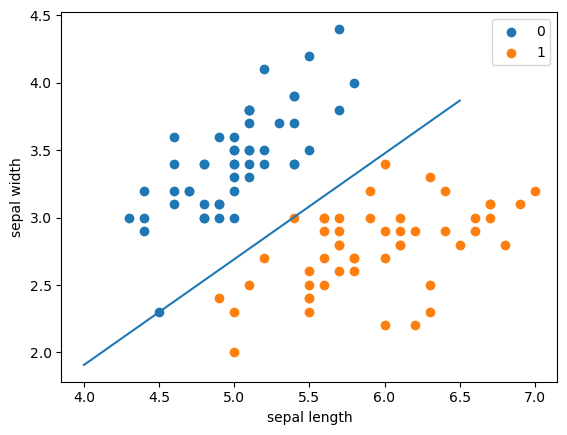

In [43]:
x_point = np.arange(4,7,0.5)
y_point = -(w[0] * x_point + b) / w[1]
plt.plot(x_point,y_point)
# 绘制散点图
plt.scatter(x[:50, 0], x[:50, 1], label='0')
plt.scatter(x[50:, 0], x[50:, 1], label='1')
# plt.plot(x, y_)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()
plt.show()